In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [114]:
#Reading the csv file
df=pd.read_csv(r'Credit card.csv')

In [115]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [116]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
260504,14,CASH_OUT,178684.97,C8826189,21907.00,0.0,C1656139345,2842641.84,3116495.42,0.0,0.0
260505,14,CASH_OUT,118586.47,C185704945,35509.00,0.0,C726864847,39.00,0.00,0.0,0.0
260506,14,CASH_OUT,308503.35,C1324237571,123433.72,0.0,C500437472,97892.36,458476.08,0.0,0.0
260507,14,CASH_OUT,310920.52,C1355560664,0.00,0.0,C625901069,1499435.86,1876515.71,0.0,0.0
260508,14,CASH_OUT,56206.95,C1695876425,0.00,0.0,NaN,NaN,NaN,NaN,NaN


In [117]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [118]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)

<ipython-input-119-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

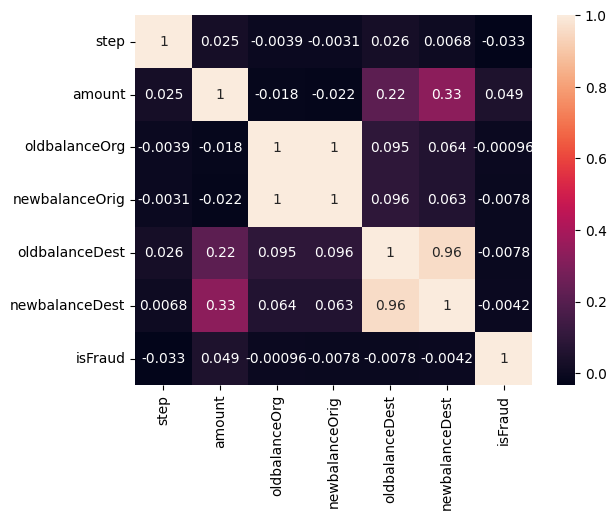

In [119]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='step', ylabel='Count'>

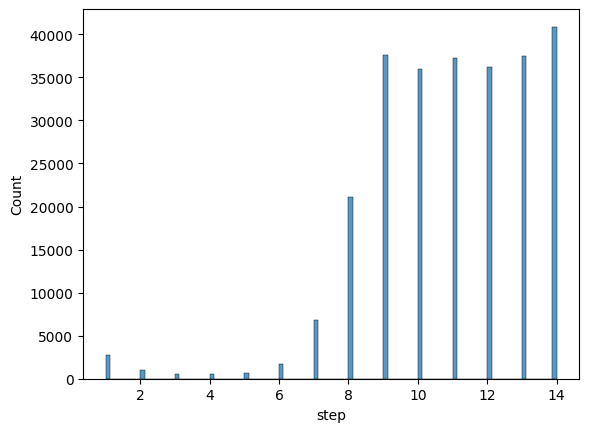

In [120]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

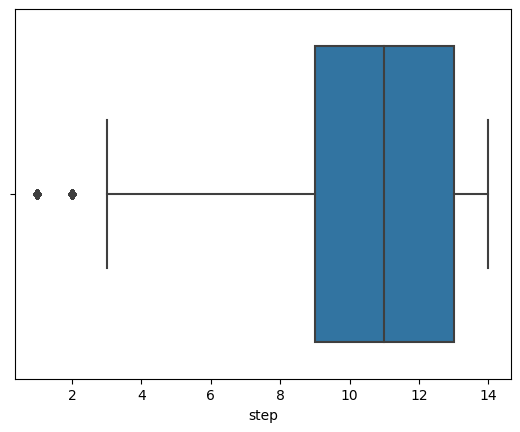

In [121]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

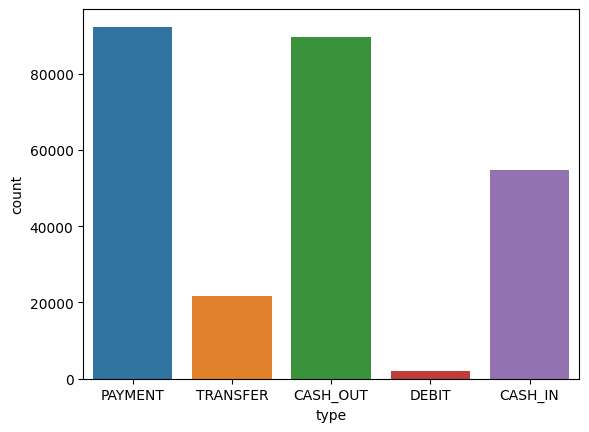

In [122]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

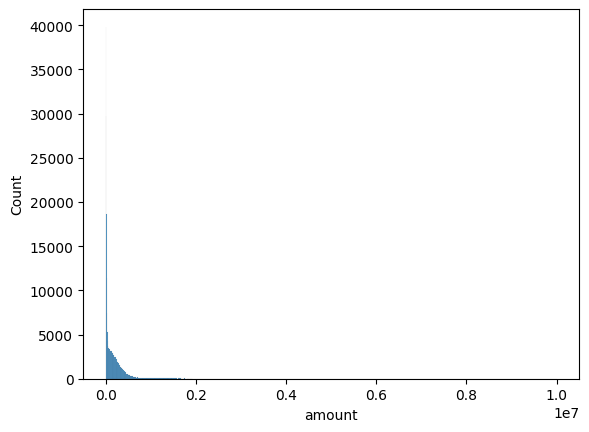

In [123]:
sns.histplot(data=df,x='amount')

In [124]:
df['isFraud'].value_counts()

0.0    260341
1.0       167
Name: isFraud, dtype: int64

In [125]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,260509.000000,260509,2.605090e+05,260509,2.605090e+05,2.605090e+05,260508,2.605080e+05,2.605080e+05,260508.000000
unique,NaN,5,NaN,260501,NaN,NaN,119861,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C260230637,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,92331,NaN,2,NaN,NaN,85,NaN,NaN,NaN
mean,10.904337,NaN,1.784775e+05,NaN,8.841306e+05,9.027391e+05,NaN,9.611855e+05,1.194126e+06,0.000641
std,2.414674,NaN,3.123849e+05,NaN,2.820156e+06,2.857684e+06,NaN,2.366205e+06,2.612450e+06,0.025311
min,1.000000,NaN,3.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,9.000000,NaN,1.246374e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,11.000000,NaN,7.483560e+04,NaN,1.878000e+04,0.000000e+00,NaN,6.998200e+04,1.682056e+05,0.000000
75%,13.000000,NaN,2.316096e+05,NaN,1.846340e+05,2.230885e+05,NaN,8.215832e+05,1.225196e+06,0.000000


Data Preprocessing

In [126]:
df.shape

(260509, 10)

In [127]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [128]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [129]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [130]:
#checking for null values
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

#Handling null values

In [131]:
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(), inplace=True)

In [132]:
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(), inplace=True)

In [133]:
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(), inplace=True)

In [134]:
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(), inplace=True)

In [135]:
df['isFraud'].fillna(df['isFraud'].mean(), inplace=True)

In [136]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260509 entries, 0 to 260508
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            260509 non-null  int64  
 1   type            260509 non-null  object 
 2   amount          260509 non-null  float64
 3   oldbalanceOrg   260509 non-null  float64
 4   newbalanceOrig  260509 non-null  float64
 5   oldbalanceDest  260509 non-null  float64
 6   newbalanceDest  260509 non-null  float64
 7   isFraud         260509 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.9+ MB


Handling outliers

<Axes: >

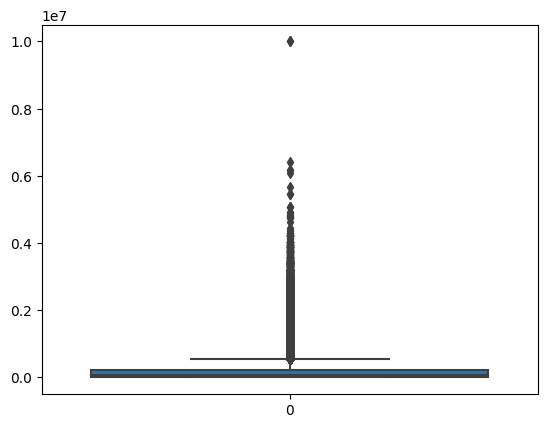

In [138]:
sns.boxplot(df['amount'])

In [139]:
#removing the outliers for Amount
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=706.25, count=4)
178477.54881048258


In [140]:
q1=np.quantile(df['amount'],0.25)
q3=np.quantile(df['amount'],0.75)

In [141]:
IQR =q3-q1
upper_bound =q3+(1.5*IQR)
lower_bound =q1-(1.5*IQR)
print('q1',q1)
print('q3:',q3)
print("IQR:",IQR)
print("Upper Bound:",upper_bound)
print("Lower Bound:'", lower_bound)
print('Skewed data', len(df[df['amount']>upper_bound]))
print('Skewed data:', len(df[df['amount']<lower_bound]))

q1 12463.74
q3: 231609.62
IQR: 219145.88
Upper Bound: 560328.44
Lower Bound:' -316255.08
Skewed data 14703
Skewed data: 0


In [142]:
#to handle the null values we use transformation techniques
def transformationPlot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)
  plt.subplot(1,2,2)
  stats.probplot(feature, plot=plt)

<ipython-input-142-81a2472fdc1b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


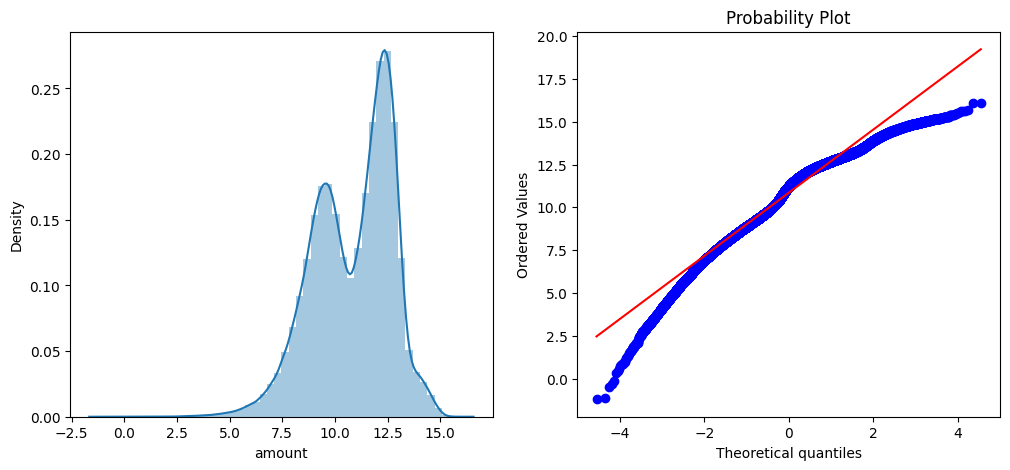

In [143]:
transformationPlot(np.log(df['amount']))

In [144]:
#Labelencoding


In [145]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
df['type']= lb.fit_transform(df['type'])


In [146]:
df['type'].value_counts()

3    92331
1    89666
0    54729
4    21782
2     2001
Name: type, dtype: int64

In [147]:
#dividing the dataset
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [148]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [149]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [150]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.2)


In [151]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(208407, 7)
(52102, 7)
(52102,)
(208407,)


Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [153]:
from sklearn.metrics import mean_squared_error
y_test_predict1=rfc.predict(x_test)

In [154]:
y_test = np.array(y_test)


In [155]:
y_test = np.round(y_test).astype(int)

In [156]:
print(set(y_test))
print(set(y_test_predict1))



{0, 1}
{0.0, 1.0}


In [157]:
test_accuracy = accuracy_score(y_test, y_test_predict1)


In [158]:
test_accuracy

0.9996545238186634

In [159]:
y_train_predict1=rfc.predict(x_train)
train_accuracy= accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [160]:
pd.crosstab(y_test,y_test_predict1)

col_0,0.0,1.0
row_0,,
0,52066,3
1,15,18


In [161]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52069
           1       0.86      0.55      0.67        33

    accuracy                           1.00     52102
   macro avg       0.93      0.77      0.83     52102
weighted avg       1.00      1.00      1.00     52102



Decision Tree Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_test_predict2 =dtc.predict(x_test)
test_accuracy= accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9994817857279951

In [163]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [164]:
pd.crosstab(y_test,y_test_predict1)

col_0,0.0,1.0
row_0,,
0,52066,3
1,15,18


In [165]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52069
           1       0.86      0.55      0.67        33

    accuracy                           1.00     52102
   macro avg       0.93      0.77      0.83     52102
weighted avg       1.00      1.00      1.00     52102



Extra Trees Classifier

In [166]:
from sklearn.tree import ExtraTreeClassifier
etc=DecisionTreeClassifier()
etc.fit(x_train, y_train)

y_test_predict3 =etc.predict(x_test)
test_accuracy= accuracy_score(y_test,y_test_predict3)
test_accuracy

0.9995201719703658

In [167]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [168]:
pd.crosstab(y_test,y_test_predict3)

col_0,0.0,1.0
row_0,,
0,52058,11
1,14,19


In [169]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52069
           1       0.63      0.58      0.60        33

    accuracy                           1.00     52102
   macro avg       0.82      0.79      0.80     52102
weighted avg       1.00      1.00      1.00     52102



Support Vector Machine

In [170]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train,y_train)

y_test_predict4 =svc.predict(x_test)
test_accuracy= accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9993666270008829

In [171]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9994242036016064

In [172]:
pd.crosstab(y_test,y_test_predict4)

col_0,0.0
row_0,
0,52069
1,33


In [173]:
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52069
           1       0.00      0.00      0.00        33

    accuracy                           1.00     52102
   macro avg       0.50      0.50      0.50     52102
weighted avg       1.00      1.00      1.00     52102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [175]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
y_train1=la.fit_transform(y_train)

In [176]:
y_test1=la.transform(y_test)

In [177]:
y_test1=la.transform(y_test)

In [178]:
y_test1

array([0, 0, 0, ..., 0, 0, 0])

In [179]:
y_train1

array([0, 0, 0, ..., 0, 0, 0])

Xgboost Classifier

In [180]:
import xgboost as xgb
xgb1=xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9996929100610341

In [181]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

0.9999904033933601

In [182]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,52066,3
1,13,20


In [183]:
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52069
           1       0.87      0.61      0.71        33

    accuracy                           1.00     52102
   macro avg       0.93      0.80      0.86     52102
weighted avg       1.00      1.00      1.00     52102



# Compare the model

In [184]:
def compareModel():
  print("train accuracy for rfc", accuracy_score(y_train_predict1,y_train))
  print("test accuracy for rfc", accuracy_score(y_test_predict1,y_test))
  print("train accuracy for dtc", accuracy_score(y_train_predict2,y_train))
  print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
  print("train accuracy for etc", accuracy_score(y_train_predict3,y_train))
  print("test accuracy for etc", accuracy_score(y_test_predict3,y_test))
  print("train accuracy for svc", accuracy_score(y_train_predict4,y_train))
  print("test accuracy for svce", accuracy_score(y_test_predict4,y_test))
  print("train accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
  print("test accuracy for xgbi", accuracy_score(y_test_predict5,y_test1))

In [185]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9996545238186634
train accuracy for dtc 1.0
test accuracy for dtc 0.9994817857279951
train accuracy for etc 1.0
test accuracy for etc 0.9995201719703658
train accuracy for svc 0.9994242036016064
test accuracy for svce 0.9993666270008829
train accuracy for xgb1 0.9999904033933601
test accuracy for xgbi 0.9996929100610341


Evaluating the model

In [186]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVC= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9993666270008829

In [187]:
y_train_predict4=svc.predict(x_train)
train_accuracy-accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9999904033933601

In [188]:
import pickle
pickle.dump(svc, open('onlinefraudDetection.pkl','wb'))